# Test `baynes_sound_agrif` Module

Render figure object produced by the `nowcast.figures.research.baynes_sound_agrif` module.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker
to help ensure that the module will work in the nowcast production context.

This notebook must be run in a
[Nowcast Figures Development Environment](https://salishsea-nowcast.readthedocs.io/en/latest/figures/fig_dev_env.html)
so that all of the necessary dependency packages are installed.
Also, it must be run on a workstation that has the Salish Sea Nowcast system `/results/` parition mounted.

In [1]:
# reload lets us pull in changes from modules that we edit
from importlib import reload

In [2]:
from pathlib import Path

import arrow

from nowcast.figures.research import baynes_sound_agrif

In [3]:
import io

import yaml

In [4]:
%matplotlib inline

The bits of `config/nowcast.yaml` that are required:

In [5]:
config = '''
    figures:
        dataset URLs:
            bathymetry: https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02
            3d phys tracer fields: https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV17-02
            3d bio tracer fields: https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DBiologyFields1hV17-02

    results archive:
        nowcast-agrif: /results/SalishSea/nowcast-agrif/

    run types:
        nowcast-agrif:
            sub-grid bathymetry: /results/nowcast-sys/grid/subgrids/BaynesSound/bathymetry_201702_BS.nc
'''

config = yaml.load(io.StringIO(config))

The bits that the `make_plots` worker must provide:

In [6]:
run_type = 'nowcast-agrif'
run_date = arrow.get('2018-08-12')

ddmmmyy = run_date.format('DDMMMYY').lower()
yyyymmdd = run_date.format('YYYYMMDD')

agrif_results_dir = Path(config['results archive'][run_type], ddmmmyy)

ss_phys_url = config['figures']['dataset URLs']['3d phys tracer fields']
bs_phys_path = agrif_results_dir/f'1_SalishSea_1h_{yyyymmdd}_{yyyymmdd}_grid_T.nc'
ss_bio_url = config['figures']['dataset URLs']['3d bio tracer fields']
bs_bio_path = agrif_results_dir/f'1_SalishSea_1h_{yyyymmdd}_{yyyymmdd}_ptrc_T.nc'
ss_grid_url = config['figures']['dataset URLs']['bathymetry']
bs_grid_path = Path(config['run types'][run_type]['sub-grid bathymetry'])

## Render the Figure

The `%%timeit` cell magic lets us keep an eye on how log the figure takes to process.
Setting `-n1 -r1` prevents it from processing the figure more than once
as it might try to do to generate better statistics.

/media/doug/warehouse/conda_envs/nowcast-fig-dev/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/media/doug/warehouse/conda_envs/nowcast-fig-dev/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


7.06 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


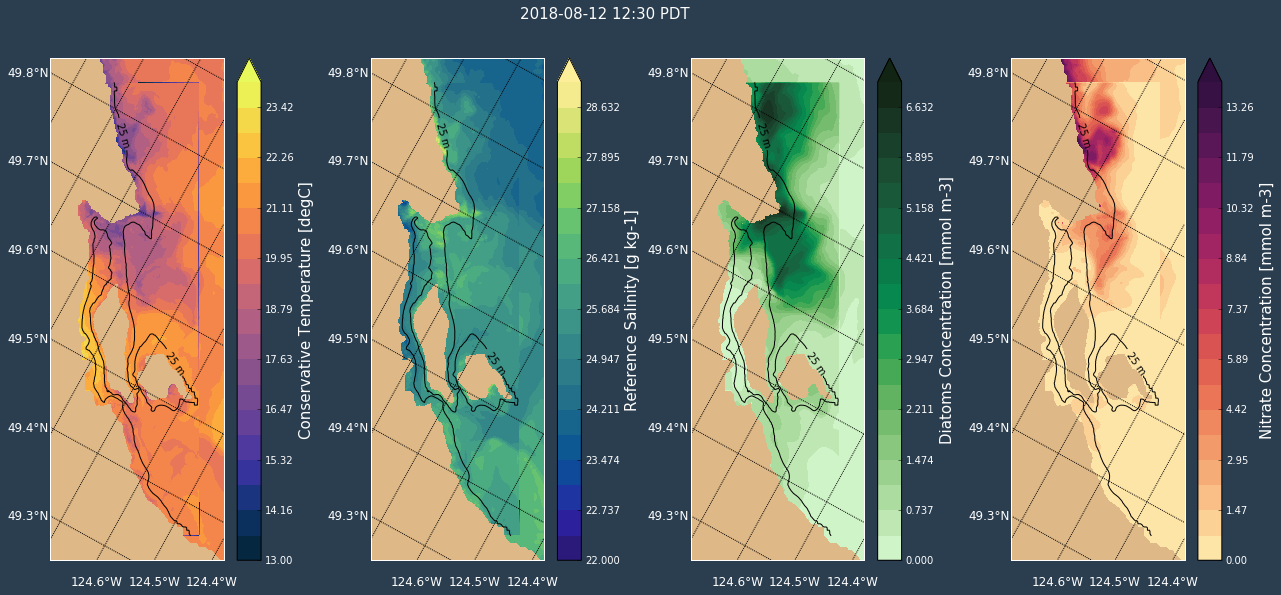

In [7]:
%%timeit -n1 -r1

reload(baynes_sound_agrif)

# Make figure
fig = baynes_sound_agrif.make_figure(
    ss_phys_url, bs_phys_path, ss_bio_url, bs_bio_path, run_date, ss_grid_url, bs_grid_path,
)